In [1]:
from sage.combinat.q_bernoulli import q_bernoulli
import copy

def sigma(k,n):
    """Return the sum of the kth power of the divisors of n"""
    return sum([i^k for i in divisors(n)])

def Eisenstein(k,n):
    """Return the nth coefficient of the Eisenstein series of weight k"""
    if k%2!=0 or k==2:
        raise ValueError("The weight should be even different from 2")
    if n==0:
        return 1
    Bk=q_bernoulli(k)(q=1)
    return -(2*k/Bk)*sigma(k-1,n)

def prod_MF(l1,l2,n):
    """ Input the n first coefficient of two series
    return the nth coefficient of the product of the two series"""
    if len(l1)<=n or len(l2)<=n:
        raise ValueError("Not enough coefficient")
    return sum([l1[i]*l2[n-i] for i in range(n+1)])

def Eis46(i,j,n):
    """Return the n first coefficients of E4^iE6^j
    """
    E4=[Eisenstein(4,r) for r in range(n+1)]
    E6=[Eisenstein(6,r) for r in range(n+1)]
    if i!=0:
        T=copy.deepcopy(E4)
        for count in range(i-1):
            S=[prod_MF(T,E4,r) for r in range(n+1)]
            T=copy.deepcopy(S)
        for count in range(j):
            S=[prod_MF(T,E6,r) for r in range(n+1)]
            T=copy.deepcopy(S)
    else:
        T=copy.deepcopy(E6)
        for count in range(j-1):
            S=[prod_MF(T,E6,r) for r in range(n+1)]
            T=copy.deepcopy(S)
    return T

def generator_MF(k,coef):
    """Input the weight of the modular forms and its k/12+1 first coefficient
    Return the modular forms in term of E4 and E6 as list:
    The first object contains the power of E4 and E3
    The second object contains their coefficient"""
    if k%12==2:
        if len(coef)<floor(k/12):
            raise ValueError("not enough coefficient")
        E=[]
        n_list=[]
        for n in range(floor(k/4)+1):
            if (k-4*n)%6==0:
                m=(k-4*n)/6
                n_list.append((n,m))
                E.append(Eis46(n,m,floor(k/12)-1))
        M=matrix(E).transpose()
        coeff=vector(coef[:floor(k/12)])
    else:
        if len(coef)<floor(k/12)+1:
            raise ValueError("not enough coefficient")
        E=[]
        n_list=[]
        for n in range(floor(k/4)+1):
            if (k-4*n)%6==0:
                m=(k-4*n)/6
                n_list.append((n,m))
                E.append(Eis46(n,m,floor(k/12)))
        M=matrix(E).transpose()
        coeff=vector(coef[:floor(k/12)+1])
    return (n_list,M.inverse()*coeff)

In [2]:
#The 10 first coefficient of the Eisenstein series of weight 4
for n in range(10):
    print(n,Eisenstein(4,n))

(0, 1)
(1, 240)
(2, 2160)
(3, 6720)
(4, 17520)
(5, 30240)
(6, 60480)
(7, 82560)
(8, 140400)
(9, 181680)


In [3]:
#The 10 first coefficient of the Eisenstein series of weight 6
for n in range(10):
    print(n,Eisenstein(6,n))

(0, 1)
(1, -504)
(2, -16632)
(3, -122976)
(4, -532728)
(5, -1575504)
(6, -4058208)
(7, -8471232)
(8, -17047800)
(9, -29883672)


In [4]:
#Take the coefficient of the Eisenstein series of weight 8 and make it in terms E4 and E6
co=[Eisenstein(8,i) for i in range(10)]
generator_MF(8,co)

([(2, 0)], (1))

In [5]:
#Take the coefficient of the Eisenstein series of weight 10 and make it in terms E4 and E6
co=[Eisenstein(10,i) for i in range(10)]
generator_MF(10,co)

([(1, 1)], (1))

In [6]:
#Take the coefficient of the Eisenstein series of weight 12 and make it in terms E4 and E6
co=[Eisenstein(12,i) for i in range(10)]
generator_MF(12,co)

([(0, 2), (3, 0)], (250/691, 441/691))

In [7]:
#Take the coefficient of the Eisenstein series of weight 14 and make it in terms E4 and E6
co=[Eisenstein(14,i) for i in range(10)]
generator_MF(14,co)

([(2, 1)], (1))

In [8]:
#Take the coefficient of the Eisenstein series of weight 16 and make it in terms E4 and E6
co=[Eisenstein(16,i) for i in range(20)]
generator_MF(16,co)

([(1, 2), (4, 0)], (2000/3617, 1617/3617))

In [9]:
#Take the coefficient of the Eisenstein series of weight 18 and make it in terms E4 and E6
co=[Eisenstein(18,i) for i in range(20)]
generator_MF(18,co)

([(0, 3), (3, 1)], (5500/43867, 38367/43867))

In [10]:
# Define all the needed tools for the class Elliptic Curve  
def powmod(n,p,m):
    """return the pth power of n modulo m"""
    if n.numerator()%m==0 or n.denominator()%m==0:
        return 0
    mult=1
    if p<0:
        n=(1/n)%m
        for count in range(-p):
            mult=(mult*n)%m
        return mult
    for count in range(p):
        mult=(mult*n)%m
    return mult
    
def Legendre_symbol(n,p): 
    """return the Legendre Symbol of n modulo p"""
    T=powmod(n,(p-1)/2,p)
    if T>1:
        return -1
    return int(T)

def valuation(n,p):
    """Return the valuation of n modulo p"""
    n=Rational(n)
    if n.denominator()%p!=0 and n.numerator()%p!=0:
        return 0
    for q in list(factor(n)):
        if q[0]==p:
            return q[1]
        
def any_coefficient(l,p):
    """Check if p divides any coefficient of the Elliptic Curves"""
    for coef in l:
        if coef!=0 and valuation(coef,p)<0:
            return True
    return False

def all_coefficient(l,p):
    """Check if all coefficient are minimal"""
    mx=[1,3,2,4,6]
    for k in range(5):
        T=Rational(l[k])
        if T==0 or valuation(T,p)<mx[k]:
            return False
    return True

In [11]:
class Ellipt:
        
    def __init__(self,param):
        """Suppose the parameter is of length 5
    Ellipti curves defined by y3+a0xy+a1y=x3+a2x2+a3x+a4
                              
    reference: The arithmetic of Elliptic curves -- Joseph H. Silvermann
    """
        
        self.ordered_param=[param[i] for i in [0,2,1,3,4]]
        a=self.ordered_param
        b2=a[0]^2+4*a[1]
        b4=2*a[3]+a[0]*a[2]
        b6=a[2]^2+4*a[4]
        b8=a[0]^2*a[4]+4*a[1]*a[4]-a[0]*a[2]*a[3]+a[1]*a[2]^2-a[3]^2
        self.c4=b2^2-24*b4
        self.c6=-b2^3+36*b2*b4-216*b6
        self.delta=-b2^2*b8-8*b4^3-27*b6^2+9*b2*b4*b6
    
    def discriminant(self):
        return self.delta
    
    def j_invariant(self):
        return self.c4^3/self.delta
    
    def min_model(self,p):
        E=self
        while(any_coefficient(E.ordered_param,p)):
            coef=E.ordered_param
            E=Ellipt([coef[0]*p,coef[2]*p^3,coef[1]*p^2,coef[3]*p^4,coef[4]*p^6])
        while(all_coefficient(E.ordered_param,p)):
            coef=E.ordered_param
            E=Ellipt([coef[0]/p,coef[2]/(p^3),coef[1]/(p^2),coef[3]/(p^4),coef[4]/(p^6)])
        return E
    
    def good_reduction(self,p):
        E=self.min_model(p)
        if valuation(E.delta,p)==0:
            return True
        return False
        
    def bad_multiplicative_reduction(self,p):
        E=self.min_model(p)
        if valuation(E.delta,p)>0 and E.c4%p!=0:
            return True
        return False
        
    
    def bad_additive_reduction(self,p):
        E=self.min_model(p)
        if valuation(E.delta,p)>0 and E.c4%p==0:
            return True
        return False
        
    def conductor(self):
        """The conductor will be skipped if 2 or 3 are bad additive reduction"""
        if self.bad_additive_reduction(2) or self.bad_additive_reduction(3):
            raise ValueError("Not able to compute the conductor yet")
        N=1
        for p,r in list(factor(self.delta)):
            if self.bad_multiplicative_reduction(p):
                N=N*p
            elif self.bad_additive_reduction(p):
                N=N*p^2
        return N
    
    def order(self,p):
        if p==1:
            return 1
        E=self.min_model(p)
        if p==2 or p==3:
            N=1
            a=E.ordered_param
            for i in range(p):
                for j in range(p):
                    if ((j**2+a[0]*i*j+a[2]*j)%p==(i**3+a[1]*i**2+a[3]*i+a[4])%p):
                        N=N+1
            return N
        A=-27*E.c4
        B=-54*E.c6
        return p+1+sum([Legendre_symbol(x^3+A*x+B,p) for x in range(p)])
    
    def cusp_coeff(self,N):
        """return the Nth coefficient of the cusp form associated to E"""
        if N==0:
            return 0
        if N==1:
            return 1
        
        if is_prime(N):
           
            return 1+N-self.order(N)
        if len(list(factor(N)))==1 and self.conductor()%list(factor(N))[0][0]!=0:
            p=list(factor(N))[0][0]
            r=list(factor(N))[0][1]
            return self.cusp_coeff(p)*self.cusp_coeff(p^(r-1))-p*self.cusp_coeff(p^(r-2))
        if len(list(factor(N)))==1 and self.conductor()%list(factor(N))[0][0]==0:
            p=list(factor(N))[0][0]
            r=list(factor(N))[0][1]
            return self.cusp_coeff(p)*self.cusp_coeff(p^(r-1))
        return prod([self.cusp_coeff(p^r) for p,r in list(factor(N))])

In [13]:
#Example of an Elliptic Curves taken randomly which does not have
#any bad additive reduction modulo 2 or 3
l=[1/9,17/63,53,73/25,39]
E=Ellipt(l)
print("The Ellipt Curves y2+{}xy+{}y=x3+{}x2+{}x+{} has conductor {}".format(l[0],l[1],l[2],l[3],l[4],E.conductor()))

The Ellipt Curves y2+1/9xy+17/63y=x3+53x2+73/25x+39 has conductor 27136132084870028053683150


In [14]:
#The cusp forms gotten from E
print("The cusp forms associated with E is of Level {} and its 100 first coefficient are".format(E.conductor()))
for i in range(100):
    print(i,E.cusp_coeff(i))

The cusp forms associated with E is of Level 27136132084870028053683150 and its 100 first coefficient are
(0, 0)
(1, 1)
(2, 1)
(3, 1)
(4, 1)
(5, 0)
(6, 1)
(7, 0)
(8, 1)
(9, 1)
(10, 0)
(11, -2)
(12, 1)
(13, 6)
(14, 0)
(15, 0)
(16, 1)
(17, 2)
(18, 1)
(19, 8)
(20, 0)
(21, 0)
(22, -2)
(23, 6)
(24, 1)
(25, 0)
(26, 6)
(27, 1)
(28, 0)
(29, 6)
(30, 0)
(31, 4)
(32, 1)
(33, -2)
(34, 2)
(35, 0)
(36, 1)
(37, -8)
(38, 8)
(39, 6)
(40, 0)
(41, 2)
(42, 0)
(43, 11)
(44, -2)
(45, 0)
(46, 6)
(47, 4)
(48, 1)
(49, 0)
(50, 0)
(51, 2)
(52, 6)
(53, -9)
(54, 1)
(55, 0)
(56, 0)
(57, 8)
(58, 6)
(59, -8)
(60, 0)
(61, 6)
(62, 4)
(63, 0)
(64, 1)
(65, 0)
(66, -2)
(67, 10)
(68, 2)
(69, 6)
(70, 0)
(71, 0)
(72, 1)
(73, -4)
(74, -8)
(75, 0)
(76, 8)
(77, 0)
(78, 6)
(79, 6)
(80, 0)
(81, 1)
(82, 2)
(83, 6)
(84, 0)
(85, 0)
(86, 11)
(87, 6)
(88, -2)
(89, -6)
(90, 0)
(91, 0)
(92, 6)
(93, 4)
(94, 4)
(95, 0)
(96, 1)
(97, -16)
(98, 0)
(99, -2)


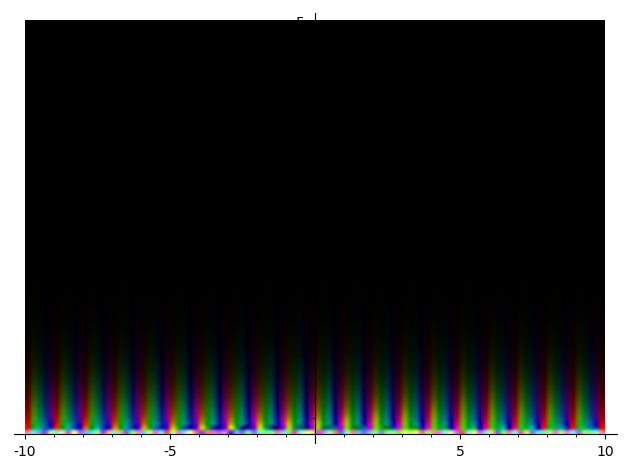

In [15]:
#Plot the cusp form
z=SR.var("z")
Cusp=sum([E.cusp_coeff(i)*e^(2*pi*z*I*i) for i in range(100)])
complex_plot(Cusp,(-10,10),(0,5))